# Import Packages

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Titanic data

In [21]:
# data url
data_path = '/content/titanic_dataset.csv'

# load the df
df = pd.read_csv(data_path,usecols=['Age','Sex','Fare','Pclass','SibSp','Embarked','Survived'])

df.head()

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
0,0,3,male,22.0,1,7.2500,S
1,1,1,female,38.0,1,71.2833,C
2,1,3,female,26.0,0,7.9250,S
3,1,1,female,35.0,1,53.1000,S
4,0,3,male,35.0,0,8.0500,S


In [22]:
# check for missing values

df.isna().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Fare,0
Embarked,2


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


# EDA

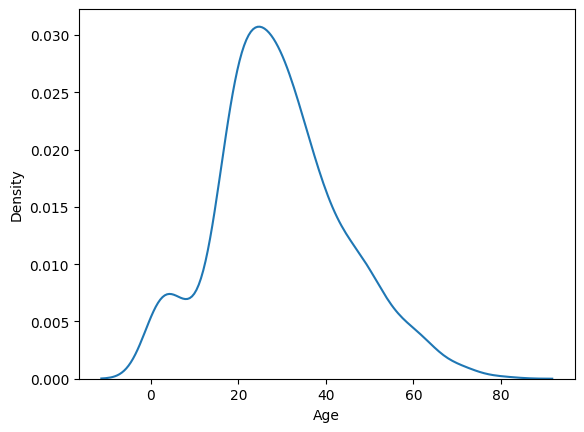

In [24]:
# distribution of age column

sns.kdeplot(data=df,x='Age');

In [25]:
# skewness of age column

df['Age'].skew()

np.float64(0.38910778230082704)

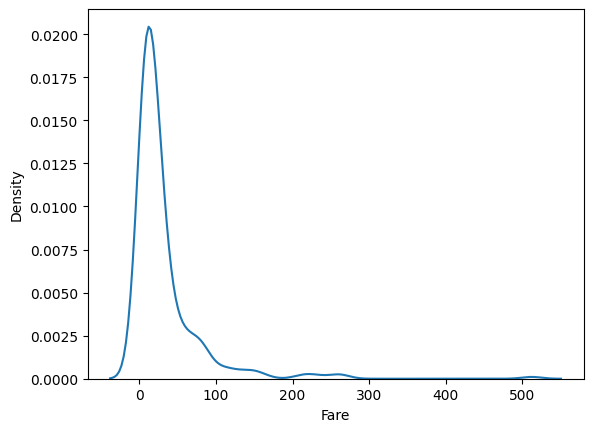

In [26]:
# distribution of fare column

sns.kdeplot(data=df,x='Fare');

In [27]:
# skewness of fare column

df['Fare'].skew()

np.float64(4.787316519674893)

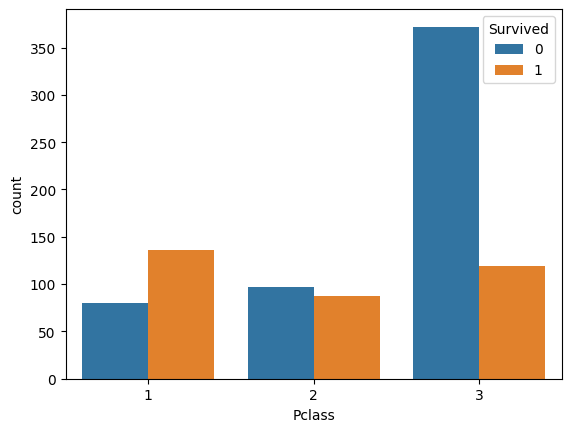

In [28]:
# distribution of Pclass

sns.countplot(data=df,x='Pclass',hue='Survived');

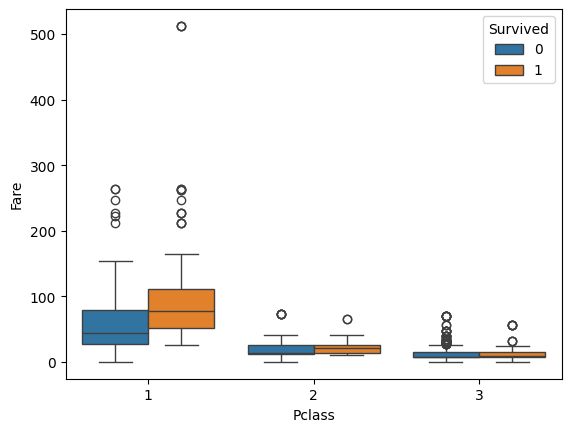

In [29]:
# boxplot of Pclass vs Fare

sns.boxplot(data=df, x='Pclass', y='Fare', hue='Survived');

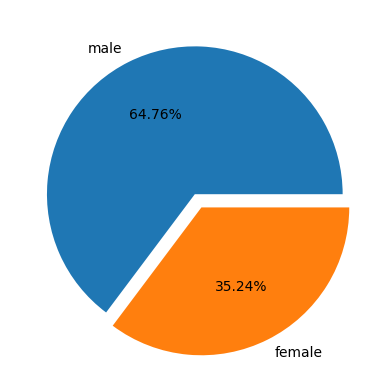

In [30]:
# gender distribution

plt.pie(df['Sex'].value_counts(),labels=df['Sex'].value_counts().index,
       autopct="%.2f%%", explode=[0,0.1]);

## Target Distribution

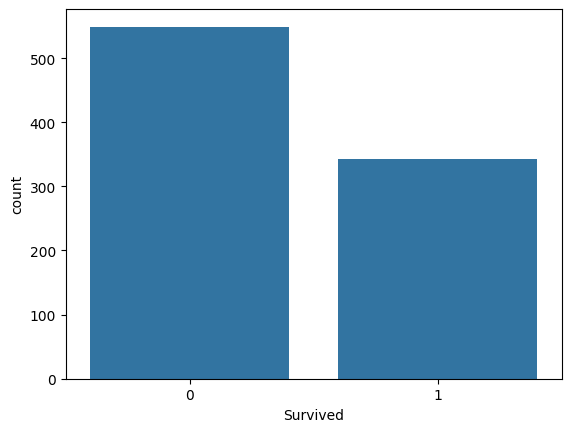

In [31]:
# target class distribution

sns.countplot(data=df,x='Survived');

# Data Preparation

In [32]:
# create X and y
X = df.drop('Survived',axis=1)

y = df['Survived']

## Train Test split

In [33]:
# do train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

print('The shape of X_train is',X_train.shape)
print('The shape of X_test is',X_test.shape)

The shape of X_train is (712, 6)
The shape of X_test is (179, 6)


In [34]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PowerTransformer
from sklearn.impute import SimpleImputer

In [64]:
import sklearn

print(sklearn.__version__)

1.6.1


In [35]:
from IPython.display import display
from PIL import Image

In [36]:
X_train.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Fare', 'Embarked'], dtype='object')

# Feature Preprocessing

In [37]:
# display(Image.open('Images/model pipeline.png'))

In [38]:
# create the Pipeline for age

age_pipe = Pipeline(steps=[
    ('impute',SimpleImputer(strategy='mean')),
    ('scale',StandardScaler())
])


# create pipeline for embarked
embarked_pipe = Pipeline(steps=[
    ('impute',SimpleImputer(strategy="most_frequent")),
    ('one_hot',OneHotEncoder(handle_unknown='ignore',drop='first',sparse_output=False))
])


In [39]:
age_pipe

Pipeline(steps=[('impute', SimpleImputer()), ('scale', StandardScaler())])

In [40]:
embarked_pipe

Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                ('one_hot',
                 OneHotEncoder(drop='first', handle_unknown='ignore',
                               sparse_output=False))])

In [41]:
# data preprocessing

preprocessor = ColumnTransformer(transformers=[
    ('age',age_pipe,['Age']),
    ('embarked',embarked_pipe,['Embarked']),
    ('fare',PowerTransformer(),['Fare']),
    ('sex',OneHotEncoder(sparse_output=False,handle_unknown='ignore'),['Sex']),

], remainder='passthrough')

preprocessor.set_output(transform='pandas')

preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('age',
                                 Pipeline(steps=[('impute', SimpleImputer()),
                                                 ('scale', StandardScaler())]),
                                 ['Age']),
                                ('embarked',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('one_hot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Embarked']),
                                ('fare', PowerTransformer(), ['Fare']),
                                ('sex',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 ['Sex'])])

# Model Pipeline

In [42]:
# model pipeline

clf = RandomForestClassifier()

model_pipe = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('model',clf)
])

model_pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('age',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['Age']),
                                                 ('embarked',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one_hot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Embarked']),
                                                 ('fare', PowerTransformer(),
                                                  ['Fare']),
                                                 ('sex',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Sex'])])),
                ('model', RandomForestClassifier())])

In [43]:
# display(Image.open('Images/model pipeline.png'))

## Model training

In [44]:
# fit the model on training data

model_pipe.fit(X_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('age',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['Age']),
                                                 ('embarked',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one_hot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Embarked']),
                                                 ('fare', PowerTransformer(),
                                                  ['Fare']),
                                                 ('sex',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Sex'])])),
                ('model', RandomForestClassifier())])

## Predictions and Evaluation

In [45]:
# do predictions

y_pred_train = model_pipe.predict(X_train)

y_pred_test = model_pipe.predict(X_test)

In [46]:
# calculate the accuracy
from sklearn.metrics import accuracy_score

train_acc = accuracy_score(y_train,y_pred_train)

test_acc = accuracy_score(y_test,y_pred_test)

print('The train accuracy is ',train_acc)
print('The test accuracy is ',test_acc)

The train accuracy is  0.9789325842696629
The test accuracy is  0.8044692737430168


NameError: name 'sklearn' is not defined

In [47]:
# do cross validation

from sklearn.model_selection import cross_val_score

score = cross_val_score(estimator=model_pipe,X=X_train,y=y_train,
                        scoring='accuracy',cv=5,n_jobs=-1)

In [48]:
# mean validation score
print('The avg validation score is',np.mean(score))

The avg validation score is 0.8076233625529401


In [49]:
score

array([0.7972028 , 0.79020979, 0.8028169 , 0.82394366, 0.82394366])

# HP tuning of model

In [50]:
# define the params grid

params = {
    'preprocessor__age__impute__strategy':['mean','median'],
    'model__n_estimators':list(range(100,550,50))
}

In [51]:
list(range(100,550,50))

[100, 150, 200, 250, 300, 350, 400, 450, 500]

In [52]:
# do hyperparameter tuning using grid_search

from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=model_pipe, param_grid=params, scoring='accuracy',
                           n_jobs=-1, cv=5, return_train_score=True,verbose=2)

In [53]:
# fit on training data

grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('age',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer()),
                                                                                         ('scale',
                                                                                          StandardScaler())]),
                                                                         ['Age']),
                                                                        ('embarked',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('one_hot',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore',
                                                                                                        spars...
                                                                         ['Embarked']),
                                                                        ('fare',
                                                                         PowerTransformer(),
                                                                         ['Fare']),
                                                                        ('sex',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['Sex'])])),
                                       ('model', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'model__n_estimators': [100, 150, 200, 250, 300, 350,
                                                 400, 450, 500],
                         'preprocessor__age__impute__strategy': ['mean',
                                                                 'median']},
             return_train_score=True, scoring='accuracy', verbose=2)

In [54]:
# best estimator

best_model = grid_search.best_estimator_

# best_params
grid_search.best_params_

{'model__n_estimators': 200, 'preprocessor__age__impute__strategy': 'mean'}

In [55]:
# best score
grid_search.best_score_

np.float64(0.8132473160642174)

In [56]:
# best index value
grid_search.best_index_

np.int64(4)

In [57]:
results = pd.DataFrame(grid_search.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_estimators,param_preprocessor__age__impute__strategy,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.403236,0.033221,0.045935,0.005427,100,mean,"{'model__n_estimators': 100, 'preprocessor__ag...",0.811189,0.783217,0.802817,...,0.803388,0.011410,13,0.97891,0.984183,0.982456,0.982456,0.982456,0.982092,0.001726
1,0.395992,0.017079,0.043527,0.001921,100,median,"{'model__n_estimators': 100, 'preprocessor__ag...",0.811189,0.762238,0.809859,...,0.807643,0.026400,5,0.97891,0.984183,0.978947,0.978947,0.980702,0.980338,0.002041
2,0.627891,0.070867,0.051578,0.002582,150,mean,"{'model__n_estimators': 150, 'preprocessor__ag...",0.797203,0.783217,0.795775,...,0.803408,0.021441,12,0.97891,0.984183,0.982456,0.982456,0.982456,0.982092,0.001726
3,0.560775,0.021196,0.054058,0.004245,150,median,"{'model__n_estimators': 150, 'preprocessor__ag...",0.811189,0.762238,0.795775,...,0.804826,0.028901,10,0.97891,0.984183,0.978947,0.978947,0.980702,0.980338,0.002041
4,0.714771,0.021168,0.059828,0.002637,200,mean,"{'model__n_estimators': 200, 'preprocessor__ag...",0.811189,0.783217,0.802817,...,0.813247,0.028026,1,0.97891,0.984183,0.982456,0.982456,0.982456,0.982092,0.001726
5,1.172977,0.251668,0.101685,0.018229,200,median,"{'model__n_estimators': 200, 'preprocessor__ag...",0.804196,0.776224,0.795775,...,0.801999,0.017600,16,0.97891,0.984183,0.978947,0.978947,0.980702,0.980338,0.002041
6,0.959943,0.110539,0.065856,0.001094,250,mean,"{'model__n_estimators': 250, 'preprocessor__ag...",0.804196,0.783217,0.802817,...,0.804806,0.015230,11,0.97891,0.984183,0.982456,0.982456,0.982456,0.982092,0.001726
7,0.860792,0.014422,0.067156,0.002989,250,median,"{'model__n_estimators': 250, 'preprocessor__ag...",0.811189,0.769231,0.795775,...,0.807633,0.029345,7,0.97891,0.984183,0.978947,0.978947,0.980702,0.980338,0.002041
8,1.018260,0.016111,0.082942,0.014330,300,mean,"{'model__n_estimators': 300, 'preprocessor__ag...",0.811189,0.776224,0.795775,...,0.801990,0.021268,17,0.97891,0.984183,0.982456,0.982456,0.982456,0.982092,0.001726
9,1.265139,0.276813,0.108243,0.039037,300,median,"{'model__n_estimators': 300, 'preprocessor__ag...",0.797203,0.776224,0.809859,...,0.807643,0.024908,5,0.97891,0.984183,0.978947,0.978947,0.980702,0.980338,0.002041


In [58]:
results.loc[grid_search.best_index_,:]

,4
mean_fit_time,0.714771
std_fit_time,0.021168
mean_score_time,0.059828
std_score_time,0.002637
param_model__n_estimators,200
param_preprocessor__age__impute__strategy,mean
params,"{'model__n_estimators': 200, 'preprocessor__ag..."
split0_test_score,0.811189
split1_test_score,0.783217
split2_test_score,0.802817


In [60]:
import pickle
pickle.dump(model_pipe, open('pipe.pkl', 'wb'))